##   Author : Riasad Alvi
###  20 Jan 2025

In [4]:
# first upload kaggle profile api key.
! pip install kaggle

In [5]:
! kaggle datasets download salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 76.9MB/s]
100% 1.06G/1.06G [00:05<00:00, 191MB/s] 


In [6]:
! unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [18]:

import tensorflow as tf


from tensorflow import keras

# Importing the Sequential model class, which allows stacking layers in a linear manner to create a neural network
from tensorflow.keras import Sequential

# Importing specific layer types used in building convolutional neural networks (CNNs)
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
# Dense: A fully connected layer used in neural networks for learning relationships between features.
# Conv2D: A convolutional layer for processing image data, used to extract spatial features.
# MaxPooling2D: A pooling layer that reduces spatial dimensions, making the model computationally efficient.
# Flatten: Converts 2D feature maps into a 1D vector to be fed into dense layers.
# BatchNormalization: Normalizes the inputs of a layer to stabilize and accelerate training.
# Dropout: A regularization technique to prevent overfitting by randomly setting a fraction of inputs to zero.


In [8]:
# Creating a dataset generator for training images from the specified directory
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',  # Path to the directory containing training images
    labels="inferred",          # Labels are inferred from the folder structure
    label_mode="int",           # Labels are integers representing class indices
    batch_size=32,              # Number of images in each batch for training
    image_size=(256, 256)       # Resizing all images to 256x256 pixels
)

# Creating a dataset generator for testing images from the specified directory
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',  # Path to the directory containing testing images
    labels="inferred",          # Labels are inferred from the folder structure
    label_mode="int",           # Labels are integers representing class indices
    batch_size=32,              # Number of images in each batch for testing
    image_size=(256, 256)       # Resizing all images to 256x256 pixels
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Defining a function to normalize images and pair them with their labels
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)  # Normalize pixel values to the range [0, 1] and cast to float32
    return image, label  # Return the normalized image along with its corresponding label

# Applying the normalization function to the training dataset
train_ds = train_ds.map(process)

# Applying the normalization function to the validation dataset
validation_ds = validation_ds.map(process)



### Purpose of the Code
This code normalizes the pixel values of images in the training and validation datasets by scaling them to the range [0, 1]. Normalization improves the performance and convergence speed of deep learning models by ensuring consistent input data ranges. The datasets are processed using the `.map()` method to apply this transformation to each batch.

In [19]:
# Creating a Sequential model to define the CNN architecture
model = Sequential()

# Adding the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# Conv2D: 32 filters, each of size 3x3, no padding ('valid'), ReLU activation function.
# input_shape=(256, 256, 3): Specifies input images are 256x256 pixels with 3 color channels (RGB).

model.add(BatchNormalization())
# BatchNormalization: Normalizes the outputs of the convolutional layer to stabilize and speed up training.

# Adding the first max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
# MaxPooling2D: Downsamples the feature maps by taking the maximum value in each 2x2 region.
# Strides of 2 reduce the size of the feature maps by half.

# Adding the second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# Conv2D: 64 filters, each of size 3x3, no padding ('valid'), ReLU activation function.
# input_shape=(256, 256, 3): Redundant declaration of input shape after the first layer.

model.add(BatchNormalization())
# BatchNormalization: Normalizes the outputs of the second convolutional layer.

# Adding the second max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
# MaxPooling2D: Another pooling layer with a 2x2 window and a stride of 2.

# Adding the third convolutional layer
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# Conv2D: 128 filters, each of size 3x3, no padding ('valid'), ReLU activation function.
# input_shape=(256, 256, 3): Redundant declaration of input shape after the first layer.

model.add(BatchNormalization())
# BatchNormalization: Normalizes the outputs of the third convolutional layer.

# Adding the third max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
# MaxPooling2D: A third pooling layer with a 2x2 window and a stride of 2.

# Flattening the 2D feature maps into a 1D vector for the dense layers
model.add(Flatten())
# Flatten: Converts the 2D feature maps into a 1D array to be passed into fully connected layers.

# Adding a dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))
# Dense: Fully connected layer with 128 neurons, applying the ReLU activation function.

model.add(Dropout(0.1))
# Dropout: Randomly sets 10% of the inputs to zero to reduce overfitting.

# Adding a dense layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))
# Dense: Fully connected layer with 64 neurons, applying the ReLU activation function.

model.add(Dropout(0.1))
# Dropout: Randomly sets 10% of the inputs to zero to further reduce overfitting.

# Adding the output layer with 1 neuron and sigmoid activation
model.add(Dense(1, activation='sigmoid'))
# Dense: Output layer with 1 neuron for binary classification.
# Sigmoid activation outputs a probability value between 0 and 1.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



### Purpose of the Code
This code builds a CNN for binary classification tasks. The model extracts features from input images using convolutional and pooling layers, processes them into a flat format, and uses dense layers to make predictions. The `sigmoid` activation in the output ensures predictions are probabilities between 0 and 1.

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
# Compiling the model with optimizer, loss function, and evaluation metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# optimizer='adam': Adam optimizer adjusts the learning rate during training for efficient weight updates.
# loss='binary_crossentropy': Used for binary classification problems, measuring the difference between predicted and actual values.
# metrics=['accuracy']: Accuracy is tracked during training to evaluate the model's performance.


In [22]:
# Training the model using training data, with 10 epochs and validation data
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)
# train_ds: The training dataset used to train the model.
# epochs=10: The model will be trained for 10 iterations over the entire dataset.
# validation_data=validation_ds: The validation dataset is used to evaluate the model's performance after each epoch.


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - accuracy: 0.5756 - loss: 1.8060 - val_accuracy: 0.5846 - val_loss: 0.6613
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 78ms/step - accuracy: 0.7070 - loss: 0.5705 - val_accuracy: 0.7418 - val_loss: 0.5120
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 85ms/step - accuracy: 0.7704 - loss: 0.4858 - val_accuracy: 0.7884 - val_loss: 0.4628
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8012 - loss: 0.4220 - val_accuracy: 0.7878 - val_loss: 0.4432
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8343 - loss: 0.3748 - val_accuracy: 0.7358 - val_loss: 0.5581
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.8758 - loss: 0.2887 - val_accuracy: 0.8038 - val_loss: 0.5982
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 80ms/step - accuracy: 0.9113 - loss: 0.2158 - val_accuracy: 0.7626 - val_loss: 0.6467
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.9401 - loss: 0.1513 - 

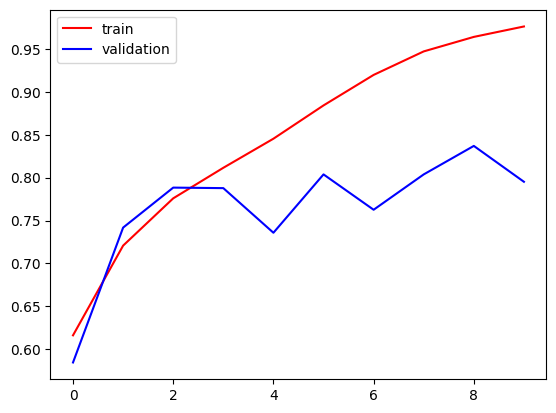

In [23]:
# Importing the library for plotting graphs
import matplotlib.pyplot as plt

# Plotting the training accuracy over epochs
plt.plot(history.history['accuracy'], color='red', label='train')
# history.history['accuracy']: Contains accuracy values for training data at each epoch.
# color='red': Sets the line color to red for better visual distinction.
# label='train': Adds a label to the plot for the training accuracy.

# Plotting the validation accuracy over epochs
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
# history.history['val_accuracy']: Contains accuracy values for validation data at each epoch.
# color='blue': Sets the line color to blue for better visual distinction.
# label='validation': Adds a label to the plot for the validation accuracy.

# Adding a legend to distinguish between training and validation accuracy lines
plt.legend()

# Displaying the plot
plt.show()



**Purpose and Significance:**
- **Purpose**: This code visualizes the training and validation accuracy over epochs to monitor how the model's performance improves during training.
- **Significance**:
  - Helps detect overfitting (when training accuracy is high but validation accuracy stagnates or decreases).
  - Provides a clear view of how well the model generalizes to unseen data as it trains.

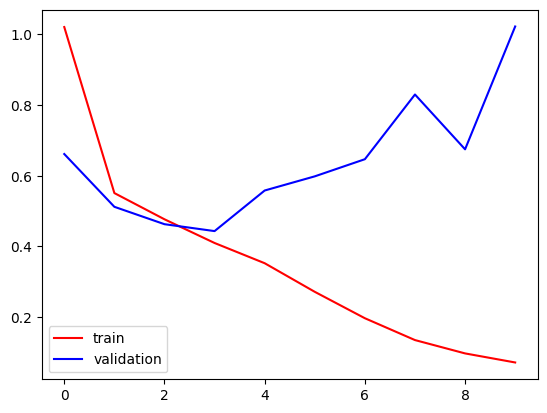

In [24]:
# Plotting the training loss over epochs
plt.plot(history.history['loss'], color='red', label='train')
# history.history['loss']: Contains loss values for training data at each epoch.
# color='red': Sets the line color to red for the training loss.
# label='train': Adds a label to the plot for the training loss.

# Plotting the validation loss over epochs
plt.plot(history.history['val_loss'], color='blue', label='validation')
# history.history['val_loss']: Contains loss values for validation data at each epoch.
# color='blue': Sets the line color to blue for the validation loss.
# label='validation': Adds a label to the plot for the validation loss.

# Adding a legend to distinguish between training and validation loss lines
plt.legend()

# Displaying the plot
plt.show()



**Purpose and Significance:**
- **Purpose**: This code visualizes the training and validation loss over epochs to monitor how the model's performance improves and stabilizes during training.
- **Significance**:
  - Helps evaluate the model's ability to minimize loss on both training and validation data.
  - Identifies potential overfitting (when training loss continues to decrease, but validation loss stagnates or increases).
  - Provides insight into whether the model is learning effectively and when it may have stopped improving.

# Ways To Reduce Overfitting :
 1. Add More data
 2. Data Augmentation
 3. L1/L2 Regularization
 4. Drop-Out (Done Here)
 5. Batch Norm (Done Here)
 6. Reduce Complexiety




# Predicting Cat or Dog on a complete new img :

In [28]:
# importing OpenCV
import cv2

In [34]:
test_img = cv2.imread('/content/dog.jpg')

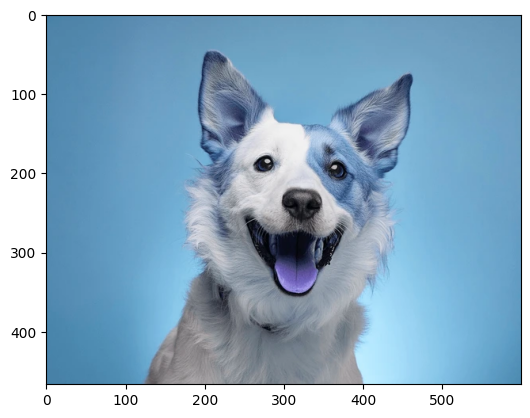

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(467, 600, 3)

In [37]:
# Resizing the input image to 256x256 pixels
test_img = cv2.resize(test_img, (256, 256))
# cv2.resize: Resizes the image to the specified size (256x256 pixels in this case).
# test_img: The image object being resized.
# (256, 256): The new size for the image (width, height).


In [38]:
# Reshaping the resized image to match the model's input shape
test_input = test_img.reshape((1, 256, 256, 3))
# reshape: Changes the shape of the image to (1, 256, 256, 3), where:
# 1: The batch size (since we are processing a single image, the batch size is 1).
# 256: The image height.
# 256: The image width.
# 3: The number of color channels (RGB).


In [41]:
# 0 -> cat
# 1 -> dog
# because in our file we passed cat.jpg before then dog.jpg
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[1.]], dtype=float32)